# 8.1.1: Extract, Transform, Load

## ETL
ETL is a flexible process for moving data. Raw data exists in multiple places and needs to be cleaned and structured before it can be analyzed. ETL breaks this problem into three steps, or phases: Extract, Transform, and Load.

1. Extract
    - Read the data, often from multiple sources.
        - The sources could be flat files, scraped webpages in HTML or JavaScript Object Notation (JSON) format, SQL tables, or even streams of sensor data. 
    - The extracted data is held in a staging area in between the data sources and data targets.

![extract](https://courses.bootcampspot.com/courses/691/files/582871/preview)

2. Transform
    - Clean and structure the data in desired form.
    - The data may need to be filtered, parsed, translated, sorted, interpolated, pivoted, summarized, aggregated, merged, or more.  
    - The goal is to create a consistent structure in the data. 
        - Without a consistent structure in our data, it's almost impossible to perform any meaningful analysis.
    - The transformation phase can be accomplished with Python and Pandas, pure SQL, or specialized ETL tools like Apache Airflow or Microsoft SQL Server Integrated Services (SSIS). 
        - Python and Pandas are especially good for prototyping an ETL transformation because they provide flexibility and interactivity (especially in a Jupyter Notebook), without enforcing any complicated frameworks. 
        
![transform](https://courses.bootcampspot.com/courses/691/files/577261/preview)
        
3. Load 
    - Write the data into a database for storage.
        - The data target can be a relational database like PostgreSQL, a non-relational database like MongoDB that stores individual documents, or a data warehouse like Amazon Redshift that optimizes performance specifically for analytics. 
![load](https://courses.bootcampspot.com/courses/691/files/582861/preview) 



    
    

# 8.2.1 Extract the Wikipedia Movies JSON

Wikipedia has a ton of information about movies, including budgets and box office returns, cast and crew, production and distribution, and so much more. Luckily, one of Britta's coworkers created a script to go through a list of movies on Wikipedia from 1990 to 2018 and extract the data from the sidebar into a JSON. Unfortunately, her coworker can't find the script anymore and just has the JSON file. We'll need to load in the JSON file into a Pandas DataFrame.


## Find the File

<b>NOTE:</b> If you're going to use any Python dependencies, it's best to import them all at the beginning. As you write your code, if you learn that you need more dependencies, add them to the import statements at the top of your code.

To start, we need to import three dependencies:

1. JSON library to extract the Wikipedia data
2. Pandas library to create DataFrames
3. NumPy library for converting data types


In [402]:
#Import dependencies
import json
import pandas as pd
import numpy as np
import re

Next, we want to import the Wikipedia JSON file. Define a variable <code>file_dir</code> for the directory that's holding our data. The exact file path will depend on the directory in which you've saved your data. For example:

    file_dir = 'C://Users/Username/DataBootcamp/'

Now, if you want to open a file in your directory, you can use an f-string (see below) instead of having to type out the whole directory every time. If you move your files, you only need to update the <code>file_dir</code> variable.
    
    f'{file_dir}filename'

In [403]:
#Import the Wikipedia JSON file
file_dir = '/Users/jesssanchez/desktop/boot_camp/analysis_projects/movies-etl/'

You may be tempted to try to read the JSON files directly into a Pandas DataFrame. While technically that may be possible, the <code>read_json</code> method that comes built into the Pandas library only works well for data that is already clean—for example, when the JSON data has every field filled in every time it is returned. We call data like this "flat."

Most data you'll work with in real life won't come to you in a flat format. One great thing about the JSON format is it's really flexible, and it can handle raw, messy data. But if you try to read raw, messy JSON data directly into a DataFrame, the DataFrame will be a mess too. It's very difficult to find and fix corrupted data in messy DataFrames, and it's also difficult to consolidate columns without headaches.

The type of data we get from doing a scrape of Wikipedia is pretty messy, so it's easier to load the raw JSON as a list of dictionaries before converting it to a DataFrame.

## Load the JSON into a List of Dictionaries
To load the raw JSON into a list of dictionaries, we will use the <code>load()</code> method.

<b>NOTE:</b> When opening files in Python, we want to use the <code>with</code> statement to handle the file resource.

- Using the <code>with</code> statement, open the Wikipedia JSON <code>file</code> to be read into the variable file, and use <code>json.load()</code> to save the data to a new variable.

In [404]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

Here, <code>wiki_movies_raw</code> is now a list of dicts. Before we take a look at the data, we should check how many records were pulled in. We can use the <code>len()</code> function.

In [405]:
len(wiki_movies_raw)

7311

#### PAUSE
Is 7,311 a reasonable number of records? We just want to make sure that we don't have an outlandishly large or small number. If we do, there's potentially something seriously wrong with the data that needs to be investigated before moving on.

   - One way to check that 7,311 is reasonable is to look at the rate of movies being released that it implies. Rough mental math here is the key—we want these calculations to be quick enough that these checks become a habit. So, let's say that it's about 7,200 movies over about 30 years. That's 240 movies released per year, or a little less than five movies released per week. That seems a little high if we're considering only major movies, but if for every two major motion pictures, there are three indie films, that doesn't seem like an outlandish number.
   
Also, we should always take a look at a few individual records just to make sure that the data didn't come in horribly garbled. With a DataFrame, we'd do this with the <code>head()</code> and <code>tail()</code> methods, but with a list of dicts, we need to inspect the records directly.

#### NOTE:
Since we're working with a list, we'll use index slices to select specific chunks of <code>wiki_movies_raw</code> to inspect directly. This is also a great use case for <b>negative index</b> slices.

In [406]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [407]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [408]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

# 8.2.2 Extract the Kaggle Data
1. Download the [zip file from Kaggle.](https://www.kaggle.com/rounakbanik/the-movies-dataset) 
2. Extract it into Analysis_Projects folder.
3. Decompress the CSV files.
    - <code>movies_metadata.csv</code>
    - <code>ratings.csv</code>
    
Since the Kaggle data is already in flat-file formats, we'll just pull them into Pandas DataFrames directly with the following code.

In [409]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

Inspect the two DataFrames using the head(), tail(), and sample() methods to make sure that everything seems to be loaded in correctly.

In [410]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,"81,452,156.00",127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,"76,578,911.00",106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [411]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.00,1425941529
1,1,147,4.50,1425942435
2,1,858,5.00,1425941523
3,1,1221,5.00,1425941546
4,1,1246,5.00,1425941556


#### SKILL DRILL
When creating a new DataFrame, you've probably made a habit of using the <code>head()</code> method to get a sense of the data and make sure it's imported correctly, and then using the <code>tail()</code> method to ensure the data at the end is imported correctly. However, errors can still occur in the middle of the file, so the <b>best practice</b> is to sample a handful of rows randomly using the <code>sample()</code> method. For a DataFrame called <code>df</code>, <code>df.sample(n=5)</code> will show five random rows from the dataset. 

In [412]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
22100477,229516,356,4.00,837708127
24782246,257655,736,4.00,965950362
6605581,68162,1241,5.00,972506914
8810166,90836,1704,5.00,1178447547
21902717,227563,1073,4.50,1111665526


# 8.3.1 Data-Cleaning Strategies
The transform step is largely spent on data cleaning. There are other transformations that aren't strictly data cleaning, but for the most part, the transformation step is used to clean up your data.

Bad data comes in three states:

- Beyond repair
- Badly damaged
- Wrong form

The state of the data largely determines which strategy you should use to clean it.

<b>Data beyond repair</b> could be data that has been overwritten or has suffered severe data corruption during storage or transfer (such as power loss during writing, voltage spikes, or hard-drive failures). The worst-case example would be having data with every value missing. All the information is lost and unrecoverable. For data beyond repair, all we can do is delete it and move on.

<b>Data that is badly damaged</b> may have good data that we can recover, but it will take time and effort to repair the damaged data. This can be garbled data, with a lot of missing values, from inconsistent sources, or existing in multiple columns. Consider trade-offs to pick the best solution (even if the "best" solution isn't perfect, but rather the "best-available" solution). 

To repair badly damaged data, try these strategies:

- Filling in missing data by
    - substituting data from another source,
    - interpolating between existing data points, or
    - extrapolating from existing data
- Standardizing units of measure (e.g., monetary values stored in multiple currencies)
- Consolidating data from multiple columns

<b>Data in the wrong form</b> should usually be fixed—that is, the data is good but can't be used in its current form. "Good" data in the wrong form can be data that is too granular or detailed, numeric data stored as strings, or data that needs to be split into multiple columns (e.g., address data). To remedy good data in the wrong form, try these strategies:

- Reshape the data
- Convert data types
- Parse text data to the correct format
- Split columns

These options are all available to us, but knowing when to perform which strategy can feel overwhelming. There is no simple checklist or flowchart we can use to guide us, and ultimately, that's a good thing. In data cleaning, we have to constantly ask ourselves what we might have missed, and following a rigid plan means we won't be asking ourselves those important questions. Data cleaning requires a lot of improvising.

#### IMPORTANT
<b>It's important to document your data cleaning assumptions as well as decisions and their motivations.</b> Later decisions depend on earlier decisions made, which can be too much to remember. Any assumptions that were part of an earlier decision can, if forgotten, ruin later steps.

Transforming a messy dataset into a clean dataset is an iterative process. As you clean one part of the data, you may reveal something messy in another part of the data. Sometimes that means unwinding a lot of work that you've already done and having to redo it with a slight change. Documenting why a particular step is necessary will show you how to redo it without introducing more errors.



# 8.3.2 Iterative Process for Cleaning Data
![cleaning data](https://courses.bootcampspot.com/courses/691/files/582911/preview)

The iterative process for cleaning data can be broken down as follows:

1. Inspect our data and identify a problem.
2. Make a plan and decide whether it is worth the time and effort to fix it.
3. Execute the repair.

    - Early iterations focus on making the data easier to investigate: deleting obviously bad data, removing superfluous columns (e.g., columns with only one value or missing an overwhelming amount of data), removing duplicate rows, consolidating columns, and reshaping the data if necessary.

    - As the data becomes easier to investigate, iterations focus on fixing the most obvious problems first. As obvious problems are resolved, more subtle problems become noticeable.

    - As the iterations shift toward solving more subtle problems, we might discover an earlier step needs to change as well as all the iterations that follow that step. It's frustrating when work has to be undone, but at least you now have a better understanding of your data.

#### NOTE
In general, earlier iterations try to handle big chunks of data at one time, such as removing columns and rows, while later iterations focus on smaller chunks of data, such as parsing values.

It's rare to reach a point where no more problems exist in the data. More likely, a point is reached where the work to fix any remaining problems isn't worth the amount of data that would be recovered. After the remaining issues are documented, the transform step is considered finished.

## Inspect

Before we can do anything, we have to look at our data. The first thing we want to know is whether or not the data was imported correctly. The simplest way to confirm this is to print out the first few data points and examine the first few rows for irregularities, e.g., data in the wrong columns, all missing values, column headers that don't make sense, or garbled characters.

   - If the data doesn't look correct, we know it wasn't imported correctly. 
       - Sometimes the beginning of the data looks fine, but if the import went wrong somewhere in the middle of the process, the rest of the data can be affected.

Therefore, it's good practice to check the last few rows and a random sample of rows. We can also start to answer some simple questions about the data:

- Does it have a consistent structure (like a CSV table) or is it unstructured (like a collection of email messages)?
- How is each data point identified—is there an explicit, unique ID for each data point, or will one need to be built?

However, most usable data contains too many data points to review every single one, so we'll need to use strategies that tell us about the whole dataset.

1. Count how many data points or rows exist. 
    - If the data is structured, count the number of columns and missing values in each column. 
    - If possible, count the number of unique values in each column and how frequently each unique value appears. 
        - To determine if this is possible, we'll need to investigate the data types for each column.

When investigating the data type for a column, we want to know what the data type is and what the data type should be. 

- For example, if we see "True" and "False" as entries for a column, we expect that the data type will be a Boolean. If the data type is a string, we need to investigate further.

If a column's data type is numeric, we can summarize its data with some basic statistics, such as measures of central tendency (e.g., mean and/or median) and measures of spread (e.g., standard deviation, interquartile range, minimum/maximum). We can also investigate columns with statistical plots, like scatter plots and histograms.
## Plan

After we've investigated our data and started to identify problem areas, we can make decisions about how to fix the problems. This requires articulating the problems clearly—even if that is simply expressing the problems to ourselves—and devising a plan to modify the data and fix the problem. In this step, we'll answer several questions, including:

- If a column doesn't have the right data type, is it a problem with the whole column? Or are just a handful of rows causing the issues?
- Do rows have outliers due to spurious data? Or are they valid data points?
- When values are missing, will they need to be removed, replaced, or interpolated?

The answers to these questions will tell us how we need to modify our data. Keep in mind, there are two main ways: we can <b>modify values</b> and we can <b>modify structure</b>.

<b>Modifying data values</b> includes removing rows or columns, replacing values, or generating new columns from old ones. 
- We might remove rows with missing or corrupted data, columns with only one value, or columns mostly missing data. 
- There are many ways we might replace data. 
    - Instead of dropping missing values, we might replace them with zeros or empty strings. 
    - We might have a column that contains nonstandard values, such as percentages that are stored as whole numbers from 0 to 100 and also as fractions from 0 to 1, and we would replace them with one standard form.

<b>Converting a column to a new data type</b> is also a form of replacing values. 
- We can also bin data (like rounding to the nearest hundred), replacing numeric data (e.g., income) with categorical data (e.g., income brackets). 
- We might generate new columns by splitting an existing column into several new columns—by splitting an address column to street, city, state, and zip code columns, for example—or by calculating a new column from multiple existing columns, like calculating total price by multiplying item prices by quantities.

<b>Modifying data structure</b> includes pivoting the values of one column into multiple columns, aggregating rows, and merging multiple data sets. It can also include aggregating large amounts of data into summary data or summary statistics.

With clearly stated steps to fix the problem, we can make an informed decision about whether implementing the plan is worth the effort. Sometimes there are multiple viable resolutions to choose from. To decide, we weigh trade-offs and ultimately choose the best option.

## Execute

Once we have a detailed list of steps to modify our dataset, it's time to implement it. We'll start writing code to fix the problem we're focusing on.

As we write, we might discover that the problem is more difficult than initially expected. This is a normal part of the process. As you implement your changes, try to take into account any unintended consequences you could introduce.

After implementing your changes, the next step is to return and inspect the data in a new iteration. This step is important, especially when modifying data structure, which can introduce missing data points, or inadvertently create more bad data.

### Cleanup Is Messy Work

While transforming your data, you might bounce between steps in the iteration—for example, making a plan, then realizing you need to inspect more; executing a plan, then realizing a step was missed and you need to quickly rework the plan. We offer these steps as a descriptive, not prescriptive, approach. Cleaning up messy data is a messy process. The best practice is to document every step of your thought process and actions in detail.

Now let's go get our hands dirty with some messy data.

# 8.3.3 Investigate the Wikipedia Data

## Initial Investigation

In [413]:
# Turn wiki_movies_raw into a DataFrame
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,"1,990.00",https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...","1,990.00",https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),"1,990.00",https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),"1,990.00",https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,"1,990.00",https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We usually use <code>head()</code> to inspect a few rows of data, but it also tells us about the shape of our DataFrame. Below the rows of data, you'll see that it says there are 5 rows of data and 193 columns. That's a lot of columns! Even if we try to use <code>print(wiki_movies_df.columns)</code>, they won't all print out. We'll have to convert <code>wiki_movies_df.columns</code> to a list to see all of the columns.
- Use <code>wiki_movies_df.columns.tolist()</code> and run the cell to see all of the column names that were imported. 

In [414]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

We can identify column names that don't relate to movie data, such as "Dewey Decimal," "Headquarters," and "Number of employees."

We modify our JSON data by restricting it to only those entries that have a director and an IMDb link. This is done by using a list comprehension.

#### NOTE:
We've used list comprehensions previously as a compact way to apply a function to every element in a list. In this module, we'll use list comprehensions to filter data.

## Use List Comprehensions to Filter Data

We've used list comprehensions in the form to compress code that would have been done in a <code>for</code> loop.
    
    [expression for element in source_list]
    
We can also filter out results using a conditional filter expression.

    [expression for element in source_list if filter_expression]
    
The resulting list will only have elements where the filter expression evaluates to True.

To create a filter expression for only movies with a director and an IMDb link, keep in mind that there are two columns in the data for director information. We'll need to check if either "Director" or "Directed by" are keys in the current dict. If there is a director listed, we also want to check that the dict has an IMDb link. Luckily, that information is only in one column, <code>imdb_link</code>.

    if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie
    
Create a list comprehension with the filter expression we created and save that to an intermediate variable <code>wiki_movies</code>. See how many movies are in <code>wiki_movies</code> with the <code>len()</code> function.

In [415]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

This only cuts the number of movies down to 7,080. Not too bad. Make a DataFrame from <code>wiki_movies</code>, and there should only be 78 columns. 

In [416]:
#wiki_movies DataFrame
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It may seem counterintuitive that we have fewer columns in the result set when we constrain our results to rows that must have data in certain columns. But there may be columns that only apply to rows that do not have data in the columns we’re targeting.

#### NOTE
This is why it's easier to load the JSON in first and then convert it to a DataFrame. Instead of trying to identify which columns in our DataFrame don't belong, we just remove the bad data points, and the bad columns never get imported in.

<b>IMPORTANT!</b>
One thing to watch out for is to make <b>nondestructive</b> edits as much as possible while designing your pipeline. That means it's better to keep your raw data in one variable, and put the cleaned data in another variable. It takes up more memory, but it makes tracking the iterative process of data cleaning easier.

For example, if we had just deleted the movies from <code>wiki_movies_raw</code> that didn't have "Directed by" as a key, we'd have made a destructive edit and missed that some have "Director" as the key instead. This can cause errors to creep in until we realize our mistake, and if we made destructive edits, it would be impossible to see what caused those errors. Using nondestructive edits helps determine the origin of errors.
- Add that filter to our list comprehension

In [417]:
wiki_movies = [movie for movie in wiki_movies_raw
              if('Director' in movie or 'Directed by' in movie)
                  and 'imdb_link' in movie
                  and 'No. of episodes' not in movie]

wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 8.3.4: Revisit Functions

Now that you've filtered out bad data, you need to clean up each movie entry so it's in a standard format. If you can make one process broad enough to handle every movie entry, you can apply that process repeatedly for every movie entry. For this task you will create a function.
- To keep things organized, we are going to make a function that performs that cleaning process.

Functions are blocks of code within a script or algorithm that perform a specific task. There are four basic parts to a function:
1. Name
2. Parameters
3. Code block
4. Return value

#### Scope
Inside the code block of a function, we can use variables that were created outside the function and initialize new variables inside the function.

This is called the "scope" of the variables: 
- Variables created outside the function are called <code>global</code> variables.
- New variables created inside the function are <code>local</code> variables.
- The hierarchy of variables is called the <code>scope</code>.

The scope of local variables only works inside the function in which they are created. If we try to access a local variable outside the function in which it's defined, Python will raise a <code>NameError</code> because it won't be able to find the function.
- We can create a local variable with the same name as a global variable. 
- Inside the function, the local variable takes precedence, but the value of the global variable will be unchanged.

In [418]:
x = 'global value'

def foo():
    x = 'local value'
    print(x)

foo()
print(x)

local value
global value


Outside the function, x has the value global value. Although we define a new function after assigning a value to the global variable x, the x inside the function is a new variable whose scope is local to <code>foo()</code>. Even after calling the <code>foo()</code> function, the global variable x keeps its original value.

However, we have to be careful with variables we send to a function. Any data structure can be sent as a parameter to a function, including dicts, lists, and tuples, but we must be careful with mutable objects.

<b>CAUTION</b>
When passing mutable objects like a <code>dict</code> or <code>list</code> as parameters to a function, the function can change the values inside the object.



In [419]:
my_list = [1,2,3]
def append_four(x):
    x.append(4)
append_four(my_list)
print(my_list)

[1, 2, 3, 4]


It changed <code>my_list</code> to <code>[1,2,3,4]</code>, even outside the function. To leave the original object unchanged, we need to make a copy. For lists, we make a copy with the <code>list</code> function; for dicts, we make a copy with the <code>dict</code> function, like so:

    new_list = list(old_list)
    new_dict = dict(old_dict)

## Lambda Functions
There's a special function we can make in Python called <b>lambda</b>, which is the most stripped-down kind we can make.
- The main benefit of lambda functions is that they can be used as one-time-use functions.
- Lambda functions are written in one line and automatically return a value without using the return keyword. 
- Lambda functions have no name and are also known as "anonymous functions."

So, how do we call a function with no name? We don't. There are functions that expect other functions to be sent to them as a parameter, and lambda functions are a way to quickly create a concise function to send as a parameter to another function. 

    #Basic syntax to a lambda function
    lambda arguments: expression
    
This function will take in an argument and will return the expression. Even though lambda functions are supposed to be anonymous, just this once we'll create a lambda function and assign a name so that we can see how they work. A lambda function that squares a value looks like the following:

In [420]:
lambda x: x * x

<function __main__.<lambda>(x)>

Here, <code>x</code> is the argument, and <code>x * x</code> is the expression. Assign this to a name so that we can use it:

In [421]:
square = lambda x: x * x
square(5)

25

#### NOTE
There are many esoteric topics related to functions, including defining functions within functions, recursion, and functions that create more functions. These are part of the functional programming paradigm. Functional programming has its place, but it also has a well-deserved reputation for being confusing and a bit niche. It's good to be aware of functional programming, but we won't rely on its concepts for this module.

## 8.3.5: Create a Function to Clean the Data, Part 1
Filtering out bad data isn't enough. You know that you need to make sure the good data that you have is clean enough to use.

Write a simple function to make a copy of the movie and return it. As we work with our data, we'll iteratively add more to our code block. 
1. To start, call the function <code>clean_movie</code>, and have it take <code>movie</code> as a parameter.

        def clean_movie(movie):

2. Because the movies are dicts and we want to make nondestructive edits, make a copy of the incoming movie.
    - To make a copy of movie, we'll use the <code>dict()</code> constructor.
    - <b>Constructors</b> are special functions that initialize new objects. They reserve space in memory for the object and perform any initializations the object requires. Also, constructors can take parameters and initialize a new object using those parameters.


When we pass <code>movie</code> as a parameter to the <code>dict()</code> constructor, it reserves a new space in memory and copies all of the info in <code>movie</code> to that new space.

As an example, we could start our function off with this code:

    def clean_movie(movie):
        movie_copy = dict(movie)
        
However, we have another trick that's even better.

Inside of the function, we can create a new local variable called <code>movie</code> and assign it the new copy of the parameter <code>movie</code>.

    def clean_movie(movie):
        movie = dict(movie) #create a non-destructive copy
        
This way, inside of the <code>clean_movie()</code> function, movie will refer to the local copy. Any changes we make inside <code>clean_movie()</code> will now only affect the copy, so if we make a mistake, we still have the original, untouched movie to reference.

3. To finish our skeleton of the clean_movie function, return the movie variable.
    
        def clean_movie(movie):
            movie = dict(movie) #create a non-destructive copy
            return movie

In [422]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    return movie

### INSPECT
Now take a look at what's going on with those languages. The first one on the list is Arabic, so let's see which movies have a value for "Arabic."

In [423]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


The results return two movies, the first listed is <i>The Insult</i>. Visit the movie's Wikipedia page for more details.

In [424]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

### PLAN

The different language columns are for alternate titles of the movie. 

1. Combine all of them into one dictionary that has all the alternate titles.
    - To do that, we need to go through each of the columns, one by one, and determine which are alternate titles. 
        - If you're not sure what a column name means, google it. 
        - Also, review a column's data to understand the type of content in that column.

For example, perhaps you've never heard of "McCune–Reischauer." Is it an esoteric filmmaking technique? Google it, and you'll learn it's a romanization system for Korean. Now look at the actual values contained in the column. If the values don't make sense to you either, google them, too.

<B>NOTE:</B> The <CODE>value_counts()</CODE> method is a quick, easy way to see what non-null values there are in a column.

#### SKILL DRILL

Go through each of the columns, one by one, and determine which columns hold alternate titles.

<b>Hint:</b> You might find it easier to sort the column names first as you're going through them. The following will display columns in alphabetical order.

    sorted(wiki_movies_df.columns.tolist())


In [425]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

### Handle the Alternative Titles

Now we can add in code to handle the alternative titles. The logic we need to implement follows:

1. Make an empty dict to hold all of the alternative titles.
2. Loop through a list of all alternative title keys:
    - Check if the current key exists in the movie object.
    - If so, remove the key-value pair and add to the alternative titles dict.
        - Use the <code>pop()</code> method to remove a key-value pair from a dict in Python.
3. After looping through every key, add the alternative titles dict to the movie object.

<b>Step 1: Make an empty dict to hold all of the alternative titles.</b>

    def clean_movie(movie):
        movie = dict(movie) #create a non-destructive copy
        alt_titles = {}
        return movie
        
<b>Step 2: Loop through a list of all alternative title keys.</b>
    
    def clean_movie(movie):
        movie = dict(movie) #create a non-destructive copy
        alt_titles = {}
            for key in ['Also known 
                as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original 
                title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:

    return movie

<b>Step 2a: Check if the current key exists in the movie object.</b>
    
    def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known 
                as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original 
                title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:

    return movie
    
    
<b>Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary.</b>

    def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known 
                as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original 
                title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)


    return movie
    
    
<b>Step 3: After looping through every key, add the alternative titles dict to the movie object.</b>

    def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known 
                as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original 
                title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

In [426]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    # Make an empty dict to hold all of the alternative titles
    alt_titles = {}
    # Loop through a list of all alternative tile keys
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        # Check if the current key exists in the movie object
        if key in movie:
            # Remove the key-value pair and add to the alternative titles dictionary
            alt_titles[key] = movie[key]
            movie.pop(key)
    # Add the alternative titles dict to the movie object
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    return movie

We can make a list of cleaned movies with a list comprehension:

In [427]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

Set <code>wiki_movies_df</code> to be the DataFrame created from <code>clean_movies</code>, and print out a list of the columns.

In [428]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

# 8.3.6: Create a Function to Clean the Data, Part 2

There are quite a few columns with slightly different names but the same data, such as "Directed by" and "Director."

We need to consolidate columns with the same data into one column. 
- We can use the <code>pop()</code> method to change the name of a dictionary key, because <code>pop()</code> returns the value from the removed key-value pair. 
    - We have to check if the key exists in a given movie record, so it will be helpful to make a small function inside <code>clean_movie()</code>.
        - Also, it's better to be explicit than implicit and write out full words, so we'll call our new function change_column_name.
    
    #### NOTE
    It's perfectly fine to define a function within another function. In fact, it's often preferable. Functions that are defined within another function live within the scope of the first equation. This means that the inner function can only be called inside the outer function. Outside the original function, it's impossible to call the inner function.
    
    One of the benefits of using a good, dedicated code editor is that you can autocomplete names, usually by pressing the Tab key when you've partially written a variable, function, or keyword. Programmers used to use short, confusing names so they wouldn't have to type out repetitive code so much, but with autocomplete, we can write more descriptive names for functions and variables.
    
### EXECUTE

Our new function should look like the following. Remember that this new function is enclosed within the clean_movie function that we created earlier:
    
        # New function
        def change_column_name(old_name, new_name):
            if old_name in movie:
                movie[new_name] = movie.pop(old_name)
                
To change every instance where the key is "Directed by" to the new key "Director," write the following inside <code>clean_movie()</code>:

    change_column_name('Directed by', 'Director')
    
There's no easy way around the next step: we have to go through each column name and decide if there's a better name for it. If you're not sure what the column is referring to, do some research—don't guess. 


   <b>Domain knowledge</b> is specific expertise in the data professional's industry or field, outside of statistics and coding. For example, a data scientist working in healthcare might need specific clinical knowledge to perform certain analyses accurately.
   
The most important thing to remember when consolidating the comments is to be consistent. For example, will we use "Composer" or "Composed by"? "Editor" or "Edited by"? Will our columns be capitalized? How will we handle plurals?

The function <code>clean_movie()</code> is starting to look a little complicated, so we should add some commenting to make it easier to understand. 

In [429]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

Now we can rerun our list comprehension to clean wiki_movies and recreate wiki_movies_df.

In [430]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

#### NOTE:
When using notebooks like Jupyter, it's easy to lose track of the order in which the code was run if you edit functions in previous cells and jump around between different cells. It's best to keep the flow of the notebook linear, if possible.

To track why certain decisions were made, show the evolution of the function through multiple cells.

Clear documentation is one of the best ways to set yourself apart from other programmers on the job. If your programming portfolio contains well-documented code and notebooks, it will also set you apart in interviews.

# 8.3.7: Remove Duplicate Rows

Now that the columns are tidied up, time to move on to the rows!

There are some data-cleaning tasks that are easier to perform on a DataFrame, such as removing duplicate rows. We just created a process to turn our JSON data into a reasonable DataFrame. We'll start by removing duplicate rows.

Since we're going to be using the IMDb ID to merge with the Kaggle data, we want to make sure that we don't have any duplicate rows, according to the IMDb ID. 
1. Extract the IMDb ID from the IMDb link.
    - To extract the ID, we need to learn regular expressions.
    
    <b>Regular expressions</b>, also known as <b>regex</b>, are strings of characters that define a search pattern. While the syntax might be new, this is a concept you're already familiar with in the noncoding world.

    For example, "MM/DD/YYYY" is a string of characters that defines a pattern for entering dates. You could say it's a regular expression that you can easily recognize because it follows a well-defined pattern. In the same way, "(###) ###-####" is a pattern for entering U.S. phone numbers. 
    
    Regular expressions are just a more formal way of defining these kinds of patterns so that our code can find them. Just remember that they're used to search for patterns in text.
    
    
First, we'll use regular expressions in Pandas' built-in string methods that work on a Series object accessed with the <code>str</code> property. We'll be using <code>str.extract()</code>, which takes in a regular expression pattern. IMDb links generally look like "https://www.imdb.com/title/tt1234567/," with "tt1234567" as the IMDb ID. The regular expression for a group of characters that start with "tt" and has seven digits is <code>"(tt\d{7})"</code>.

- <code>"(tt\d{7})"</code> — The parentheses marks say to look for one group of text.
- <code>"(tt\d{7})"</code> — The "<code>tt</code>" in the string simply says to match two lowercase Ts.
- <code>"(tt\d{7})"</code> — The "<code>\d</code>" says to match a numerical digit.
- <code>"(tt\d{7})"</code> — The "<code>{7}</code>" says to match the last thing (numerical digits) exactly seven times.

Since regular expressions use backslashes, which Python also uses for special characters, we want to tell Python to treat our regular expression characters as a raw string of text. Therefore, we put an <code>r</code> before the quotes. We need to do this every time we create a regular expression string. We’ll put the extracted IMDB ID into a new column.     

In [431]:
# Extract the IMBD ID
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

2. Drop any duplicates of IMDb IDs by using the <code>drop_duplicates()</code> method. 
- To specify that we only want to consider the IMDb ID, use the <code>subset</code> argument, and set <code>inplace</code> equal to <code>True</code> so that the operation is performed on the selected dataframe. Otherwise, the operation would return an edited dataframe that would need to be saved to a new variable. 
    - We also want to see the new number of rows and how many rows were dropped. 

In [432]:
# OG rows
print(len(wiki_movies_df))

# New rows
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.sample(n=5)

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
1304,https://en.wikipedia.org/wiki/A_Little_Princes...,1995,https://www.imdb.com/title/tt0113670/,A Little Princess,"[A Little Princess, by, Frances Hodgson Burnett]","[Eleanor Bron, Liam Cunningham, Liesel Matthews]",NaN,Emmanuel Lubezki,"[May 10, 1995, (, 1995-05-10, )]",97 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0113670
2345,https://en.wikipedia.org/wiki/What_Dreams_May_...,1998,https://www.imdb.com/title/tt0120889/,What Dreams May Come,"[What Dreams May Come, by, Richard Matheson]","[Robin Williams, Cuba Gooding Jr., Annabella S...",NaN,Eduardo Serra,"[October 2, 1998, (, 1998-10-02, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0120889
2950,https://en.wikipedia.org/wiki/The_Safety_of_Ob...,2001,https://www.imdb.com/title/tt0256359/,The Safety of Objects,NaN,"[Glenn Close, Dermot Mulroney, Jessica Campbel...",NaN,Enrique Chediak,"[April 24, 2001, (, 2001-04-24, )]",121 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0256359
3603,https://en.wikipedia.org/wiki/The_Princess_Dia...,2004,https://www.imdb.com/title/tt0368933/,The Princess Diaries 2:Royal Engagement,"[Characters, by, Meg Cabot]","[Julie Andrews, Anne Hathaway, Heather Mataraz...",NaN,Charles Minsky,"[August 11, 2004, (, 2004-08-11, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0368933
463,https://en.wikipedia.org/wiki/Alien_3,1992,https://www.imdb.com/title/tt0103644/,Alien 3,"[Characters, by, Dan O'Bannon, Ronald Shusett]","[Sigourney Weaver, Charles S. Dutton, Charles ...",NaN,Alex Thomson,"[May 22, 1992, (, 1992-05-22, )]",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0103644


## Remove Mostly Null Columns
Now that we've consolidated redundant columns, we want to see which columns don't contain much useful data. Since this is scraped data, it's possible many columns are mostly null.

#### SKILL DRILL
What code could you write to programmatically see how many null values are in each column? Could you do it in one line of code? Take a minute and think about it before trying it out in code.

### One way to get the count of null values for each column is to use a list comprehension.

In [433]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

### You could also use a for loop and a print statement.

Either way, we can see about half the columns have more than 6,000 null values. We could remove them by hand, but it's better to do it programmatically to make sure we don't miss any. Let's make a list of columns that have less than 90% null values and use those to trim down our dataset.

In [434]:
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

<b>IMPORTANT!</b>
You may have noticed that the "alt_titles" column we created earlier was deleted by this bit of code. It might feel like all that work we did was futile, but it's not. It's possible that all of the alternate title columns individually had less than 10% non-null values, but collectively had enough data to keep. We wouldn't know that unless we put in that work.

This is normal for data cleaning because it's an iterative process. Sometimes the hard work you put in doesn't seem to make it to the final product, but don't worry, it's in there.

And with that, we've reduced 191 messy columns down to 21 useful, data-filled columns. That's awesome data-cleaning work!

# 8.3.8: Make a Plan to Convert and Parse the Data
The Wikipedia data is now structured in tabular form, but Britta needs it to have the right data types once it's in the SQL table. 
- To convert those columns to numbers, the data needs to be parsed.

For example, we can't do analysis on numeric data if it's stored as a string in the SQL table—it needs to be stored in numeric format. Some of the data also has numeric information written out (like the word "million"). 

We've got our DataFrame columns trimmed down to just the ones we want, but some of the columns have data stored as text when it should be a different data type, such as numeric data or datetimes. To convert those columns, we need to understand how to use regular expressions.

Regular expressions are ridiculously powerful, but they can be intimidating at first. There are even seasoned programmers who still don't feel entirely comfortable with regular expressions, but don't worry. We'll break down each step, and before you know it, you'll be rocking regular expressions like a pro.

First, we need to identify which columns need to be converted. wiki_movies_df.dtypes will display the data type for each column.

The apply function takes and applies another function to every single value of a Pandas series. Looking through the data, column by column, we see that:

- <b>Box</b> office should be numeric.
- <b>Budget</b> should be numeric.
- <b>Release date</b> should be a date object.
- <b>Running time</b> should be numeric.

The box office and budget amounts aren't written in a consistent style, so we're going to need a powerful way to parse their data correctly. We've already dipped a toe into regular expressions; now it's time to dive all the way in.

We'll start on the box office data, which should give us code that we can reuse and tweak for the budget data since they're both currency. It will be helpful to only look at rows where box office data is defined, so first we'll make a data series that drops missing values.


In [435]:
# Make a data series that drops missing values
box_office = wiki_movies_df['Box office'].dropna()
box_office.head()

0       $21.4 million
1        $2.7 million
2         $57,718,089
3          $7,331,647
4    $6,939,946 (USA)
Name: Box office, dtype: object

As a habit, always check the number of data points that exist after you drop any data. Here we have 5,485 movies with box office data. Does that seem like a reasonable amount? 
- It's about 5,500 movies out of 7,000, which is a little more than three-quarters. Box office data is reported by multiple sources, and we'd expect some percentage of them to not have reliable box office numbers, or for smaller indie films to not have any box office numbers published at all. Twenty-five percent would mean the bottom quartile of movies has no box office data, which seems a little high, but for every movie missing box office data, there are a little more than three movies that do have box office data. Also, 5,500 is still a good number of movies to perform analysis on (more than 180 movies per year).

<b>Regular expressions only work on strings</b>, so we'll need to make sure all of the box office data is entered as a string. By using the <code>apply()</code> method, we can see which values are not strings. First, make a <code>is_not_a_string()</code> function:

In [436]:
def is_not_a_string(x):
    return type(x) != str

box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

Having to create a new function every time we want to use the <code>map()</code> method is cumbersome and interrupts the readability of our code. What we want is a stripped-down, one-line way of writing our functions. Also, we don't need to use it ever again outside of our <code>map()</code> call, so we don't need to give it a name. 

This is what <b>lambda functions</b> are made for! Instead of creating a new function with a block of code and the def keyword, we can create an anonymous lambda function right inside the <code>map()</code> call.
- Remember, lambda functions don't have a name (because they don't need one) and automatically return a variable. 
- They use the following syntax:

      lambda arguments: expression

The lambda function version of <code>is_not_a_string()</code>:
        
      lambda x: type(x) != str
        


In [437]:
#Update our map() call to use the lambda function directly instead of using is_not_a_string()
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

From the output, we can see that there are quite a few data points that are stored as lists. 
- There is a <code>join()</code> string method that concatenates list items into one string; however, we can't just type <code>join(some_list)</code> because the <code>join()</code> method belongs to string objects. We need to make a separator string and then call the <code>join()</code> method on it. 

In [438]:
# For example
some_list = ['One', 'Two', 'Three']
'Mississippi'.join(some_list)

'OneMississippiTwoMississippiThree'

We'll use a simple space as our joining character and apply the <code>join()</code> function only when our data points are lists. 

In [439]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

Looking through the data, many of the box office numbers are written either like "\$123.4 million" (or billion) or "\$123,456,789." We'll use regular expressions to find out just how many of each style are in our data.
- There is a built-in Python module for regular expressions: <code>re</code>.
    
      #Import library with the other import statements
      import re
      
<b>Note:</b> 
Python best practices recommend putting all of your import statements at the beginning of your program. If you realize that you need to import another module, it's better to add it to the top rather than have import statements scattered throughout your program, especially when using Jupyter notebooks. Because cells can be run out of order, when import statements are used in other cells, it's easy for them to get lost, and for a cell to have code that depends on another module end up before the cell that imports the module.

# 8.3.9: Write Regular Expressions

<b>Regular expressions</b> are strings of characters that are used as a search pattern. 
- They are used to test if strings are in a specific format or contain a substring in a specific format, to extract pertinent information from strings while discarding unnecessary information, and to perform complicated replacements of substrings.
- Sometimes they are the only viable solution to a problem.

Each character in a regular expression serves a purpose, based on what kind of character it is. 

## Literal Characters
<b>Literal characters</b> are the simplest character class. A regular expression made of literal characters will match any string that contains the expression as a substring. 

For example, if we made a regular expression of the string "cat" and used it to search for any matches in another string—"The tomcat was placated with the catch of the day"—it would match three times: "The tom<b>cat</b> was pla<b>cat</b>ed with the <b>cat</b>ch of the day."

However, regular expressions also have special characters that make it much more powerful than just finding a substring. (We've already used the special character <code>\d</code> to find any digit from 0 to 9).

<b>NOTE:</b> 
You might be thinking, "But \d is two characters!" You're not wrong. It is written with two characters. However, backslashes in strings have a long history of being used to write special characters that would be difficult to enter directly.

For example, there is a character in ASCII and Unicode for creating a new line (it's aptly named "newline character"). However, adding it to a string is difficult to do, so we write <code>\n</code> inside the string, which Python converts to the newline character. 

Regular expressions also treat character combinations that start with a backslash as one character, so it's fine to refer to them as a single character.

## Character Types: \d, \w, \s (and \D, \W, \S)
As we've seen, <code>\d</code> is a special character that matches any digit from 0 to 9. There are other special characters like <code>\d</code>. The full list is:

- <code>\d</code> will match any digit from 0 to 9.
- <code>\D</code> will match any non-digit character.
- <code>\w</code> matches a word character (a letter, digit, or underscore).
- <code>\W</code> matches any non-word character (anything other than a letter, digit, or underscore, such as spaces and punctuation).
- <code>\s</code> will match any whitespace character (including spaces, tabs, and newlines).
- <code>\S</code> will match any non-whitespace characters.
    
## Character Sets: [ ]
If we need to be more specific than digits, alphanumeric characters, or whitespace characters, we can use the square brackets to define a character set. 

For example, "[ceh]at" would match '"<b>cat</b>", "<b>eat</b>", "<b>hat</b>", and "<b>that</b>", but not "rat."

We can also specify ranges of characters inside a character set. For example:

- <code>"[a-z]"</code> matches any lowercase letter.
- <code>"[A-Z]"</code> matches any uppercase character.
- <code>"[0-9]"</code> matches any digit.

We can include multiple ranges, so:

- <code>"[a-zA-Z]"</code> matches any lowercase or uppercase letter.
- <code>"[a-zA-Z0-9]"</code> matches any alphanumeric character.

But, we can also have smaller ranges, such as:

- <code>"[A-E]"</code>would match "A", "B", "C", "D", or "E".
- <code>"[1-3]"</code> would match the digits "1", "2", or "3".

We can also include character types inside a character set, so <code>"[a-zA-Z\d]"</code> and <code>"[a-zA-Z0-9]"</code> are equivalent expressions that would match any alphanumeric character.

Inside of a character set, we can specify a character that we do NOT want to include by prefacing it with a caret: <code>^</code>.

<b>Question:</b> Which regular expression(s) would match both “million” and “billion”?
     
    "[mb]illion"
    
- The brackets will check for a character that is either “m” or “b,” and the rest of the string is composed of literal characters. Order doesn’t matter in a character set.

## Match (Almost) Everything: .
The period, or dot (<code>.</code>), is a <b>wildcard</b> in regular expressions, which means it will match any single character whether it is a digit, a letter, whitespace, or punctuation. The only thing that a dot won't match is a line break (remember, line breaks are also stored as characters). In Python's regular expression module, there's an option to make the dot match every character, including line breaks.

## Escaping: \
The dot and square brackets are examples of <b>metacharacters</b> in regular expressions. Metacharacters are like the superheroes in a regular expression because they have powers like "match everything" or "create a character set."

But what if we need metacharacters to act like ordinary literal characters? 
- For example, if we use the regular expression <b>"ca.,"</b> the dot will match any character, so "<b>cat</b>", "<b>car</b>", "<b>cab</b>", "<b>ca!</b>", "<b>ca?</b>", and "<b>ca.</b>" would all be matches.

What if we want to specifically search for only <b>ca.</b>" with an actual period? The period by itself in a regular expression is being a superhero, matching everything. So when we want it to act like just a literal character, we need to give it a secret identity. 
- We use the backslash "<code> \ </code>" to do this. 
    - The backslash tells the parser to treat the upcoming metacharacter like a literal character. 
     - So, "ca \ ." will only match "ca.". 
     - Strings such as "cat", "car", and "cab", and the others from above won't be matched.

The backslash in a regular expression is called the <b>escape character</b>. It says that the next character gets to escape its duties as a special character in the regular expression and act like a plain old literal character. 
- We'll meet more superpowered metacharacters, such as curly brackets, parentheses, and plus signs. 
    - If we want to match text that has curly brackets, parentheses, or plus signs, we'll use the backslash to treat these superpowered metacharacters like literal characters.

<b>Question:</b> How would you write a regular expression that matches “cat\dog”?

    "cat\\dog"
    
- The backslash escapes everything, including itself. The first backslash says, “the next character should be treated literally,” so the second backslash is the character being treated literally. 

## Special Counting Characters: *, +, {}, ?

There are also special <b>counting</b> characters that specify how many times a character can show up.

The first counting character is the asterisk: <b> * </b>.
- In regular expressions, the asterisk says the previous character can repeat any number of times, including zero. 
    - So, "<b>ca*t</b>" would match "<b>cat</b>" and "<b>caaat</b>" but also "<b>fict</b>ion." 

If we want to specify that the character has to show up at least once, we use the plus sign: <b> + </b>. 
   - So, "ca+t" would match "<b>cat</b>" and "<b>caaat</b>" but not "fiction."

If we want to search for a character that shows up an exact number of times, we use the curly brackets: <b>{ }</b>. 
- When we extracted the IMDb IDs, we wanted IDs that had exactly seven digits, or <code>"\d{7}"</code>. 

We can also put two numbers in curly brackets, and that would match for any number of digits within that range. 
- So, "ca{3}t" wouldn't match "cat" or "fiction" but would match "<b>caaat.</b>" "ca{3,5}t" would match "<b>caaat</b>", "<b>caaaat</b>", and "<code>caaaaat</code>" but not "cat" or "caaaaaat."

Finally, the question mark can be considered a counting character as well. The question mark is for optional characters, which means they can show up zero or one time. So, "ca?t" is equivalent to the regular expression pattern "ca{0,1}t".

## Alternation: |
If we want to search for a given string or a different string, we use the alternation character, or pipe: |. This essentially functions as a logical OR. 
- For example, if we wanted to match "cat" or "mouse" or "dog," we would make a string "cat|mouse|dog."

## String Boundaries: \ ^ and \ $
If we need to make sure that our expression matches only at the beginning or ending of the string, we use the caret (<b> \^ </b>) to represent the beginning of the string, and the dollar sign (<b> \$ </b>) to represent the end of the string. 
- So, "\^cat" would match "<b>cat</b>" and "<b>catatonic</b>," but not "concatenate." " cat \$ " would also match "<b>cat</b>" and "tom<b>cat</b>," but not "catatonic."

By themselves, the string boundaries represent <b>zero length matches</b>; they don't match any actual characters themselves, just the boundaries of the string being searched.


## Capture Groups: ( )
Grouping in regular expressions serves two purposes. 
1. First, groups can be used to add structure to a search pattern. 
- For example, "1,000", "1,000,000", and "1,000,000,000" as strings all have a similar structure. There is a comma followed by three zeros that repeats as a group. 
    - We can match all of these with one regular expression, using parentheses to create a capture group. 
        - One regular expression that matches all three strings would be "1(,000)+."

2. The second purpose for grouping is hinted at in the name "capture group." <b>Capture groups</b> are how regular expressions define what information should be extracted.
- For example, when we needed to extract IMDb IDs from the links, we put the entire expression inside brackets. 
- This can also be helpful when you need to make sure a long string matches a certain format, but you only need a substring inside of it.

For example, <code>"\d{3}-\d{3}-\d{4}"</code> would match any phone number in the form "333-333-4444, but if you wanted to extract only the digits, you would use <code>"(\d{3})-(\d{3})-(\d{4})""</code>, and only the digits would be captured. Specifically, the digits of the phone number would be captured into three groups: area code, prefix, and line number.

## Non-Capturing Groups and Negative Lookahead Groups: (?: ), (?! )
We can modify the behavior of a group by including a question mark after the opening parenthesis. The first modification is a <b>non-capturing group</b>, which uses a colon after the question mark. This specifies that we only want to use the grouping structure, and we do not need to capture the information.

Non-capturing groups can feel superfluous when we're using regular expressions for just matching, but they become very important when we use regular expressions for matching and replacing.

Suppose we're anonymizing a list of phone numbers of the form "333-333-4444," and we want to change the prefix to "555," like the fake phone numbers in movies. We still need to have groups in our regular expression for the area code and the four-digit line number, but we don't want to capture them—we only want to capture the prefix.

The regular expression <code>"(?:\d{3})-(\d{3})-(?:\d{4})"</code> will match numbers of the form "123-456-7890," but it will only capture the middle group, the prefix. For example:
- "212-<b>012</b>-9876" matches the regular expression <code>"(?:\d{3})-(\d{3})-(?:\d{4})"</code>, but only "012" is captured. 
    - So, if we used this regular expression to replace the captured text with "555," it would turn "212-012-9876" to "212-555-9876."
- However, "012-3456" wouldn't match at all, because there's no area code. Even though the area code is in a non-capturing group, the regular expression still needs to see it before it can make a match.

<b>Negative lookahead groups</b> are also non-capturing groups, but they look ahead in the text and make sure a string doesn't exist after the match.

For example, imagine we have text with phone numbers still in the form "333-333-4444," but the text also contains ID numbers that are of the form "333-333-55555." 
- The regular expression we've been using—<code>"(\d{3})-(\d{3})-(\d{4})"</code>—will see the first 10 numbers of the ID and recognize a match and return "333-333-5555" as if it were a phone number.

What we need is a regular expression that matches the first 10 numbers, but also checks that there isn't another digit after the phone number. We need a group that looks ahead of the rest of the regular expression, and reports back "negative" if there's some text we don't want to see.

That's a <b>negative lookahead group</b>. Negative lookahead groups start with a question mark and an exclamation mark. 
- So, to make sure there are no extra digits, a negative lookahead group would be "(?!\d)". 
    - Our new regular expression is <code>"(\d{3})-(\d{3})-(\d{4})(?!\d)"</code>:
        - "333-333-4444" will match.
        - "333-333-55555" will not.
       

# 8.3.10: Parse the Box Office Data

Remember, there are two main forms the box office data is written in: "$123.4 million" (or billion), and "$123,456,789." We're going to build a regular expression for each form, and then see what forms are left over.

## Create the First Form
For the first form, our pattern match string will include six elements in the following order:
1. A dollar sign
2. An arbitrary (but non-zero) number of digits
3. An optional decimal point
4. An arbitary (but possibly zero) number of more digits
5. A sppace (maybe more than one)
6. The word "million" or "billion"

### Step 1: Start with a dollar sign.
The dollar sign is a special character in regular expressions, so we'll need to escape it.

    "\ $"



### Step 2: Add an arbitary (but non-zero) number of digits.
Add the <code> \d </code> character to specify digits only, and the <code> + </code> modifier to capture one or more digits. 
    
    "\ $d+"

### Step 3: Add an optional decimal point.

The decimal point is a special character, so it needs to be escaped with a backslash. 
- Since the decimal point is optional, add a question mark modifier after it:
     
      "\$\d+\.?"

### Step 4: Add an arbitary (but possibly zero) number of more digits.

Use the <code> \d </code> character to specify digits only with the <code> * </code> modifier because there may be no more digits after the decimal point.
    
    "\$\d+\.?\d*"

### Step 5: Add a space (maybe more thann one).
Use the <code> \s </code> character to match whitespace characters. Match any number of whitespace characters with the <code> * </code> modifier.
     
    "\ $\d+\.?\d*\s*"

### Step 6: Add the word "million" or "billion."

Since "million" and "billion" only differ by one letter, we can match it with a character set for the first letter. We specify character sets with square brackets. Add <code>"[mb]illion" </code> to the end of our string.

    "\ $\d+\.?\d*\s*[mb]illion"
    
Sites like https://regex101.com let you test your regex expressions on texts.

- Create a variable <code> form_one </code> and set it equal to the finished regular expression string. Preface the string with an <code> r </code> so that the escape characters remain.

In [440]:
# Create variable equal to regex string
form_one = r'\$\d+\.?\d*\s*[mb]illion'

1. Use the <code>str.contains()</code> method on <code>box_office</code> to count up how many box office values match our first form.
2. Add an argument called <code>flags</code> and set it equal to re.IGNORECASE to ignore whether letters are uppercase or lowercase.
3. Call the <code>sum()</code> to count up the total number that return True.

In [441]:
# Count up how many box office values match our first form
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

#### FINDING
There are 3,896 box office values that match the form "$123.4 million/billion."

## Create the Second Form

<b>Match the numbers of our second form, "$123,456,789." </b> 

Include:
1. A dollar sign
2. A group of one to three digits
3. At least one group starting with a comma and followed by exactly three digits

### Step 1: Start with a dollar sign.
Escape the dollar sign for it to match.

   <code> "\$" </code>
    

### Step 2: Add a group of one to three digits.

Modify the <code>\d</code> character (for digits) with curly brackets to only match one through three repetitions.

   <code> "\$\d{1,3}" </code>

### Step 3: Match at least one group starting with a comma and followed by exactly three digits.
- To match a comma and exactly three digits, we'll use the string ",\d{3}". 
    - To match any repetition of that group, we'll put it inside parentheses, and then put a plus sign after the parentheses: "(,\d{3})+". 
        - We'll add one more modification to specify that this is a non-capturing group by inserting a question mark and colon after the opening parenthesis: "(?:,\d{3})+". 
        
    <code>"\$\d{1,3}(?:,\d{3})+"</code>

1. Create another variable <code>form_two</code> and set it equal to the finished regular expression string. 
    - Don't forget to make it a raw string so Python keeps the escaped characters!
    
2. Count up the number of box office values that match this pattern. 
    - Don't forget to put an r before the string and set the flags option to include <code>re.IGNORECASE</code>.

In [442]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

#### FINDING
There are 1,544 box office values that match the form "$123,456,789."

## Compare Values in Forms

Most of the box office values are described by either form. Now we want to see which values aren't described by either. To be safe, we should see if any box office values are described by both.

To make our code easier to understand, we'll create two Boolean Series called matches_form_one and matches_form_two, and then select the box office values that don't match either.

In [443]:
# Create the two Boolean series
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

Recall the Python logical keywords "not," "and," and "or." Try the following code to see which values in box_office don't match either form.

    # this will throw an error!
    box_office[(not matches_form_one) and (not matches_form_two)]
    
The code above will give you a <code>ValueError</code> with the explanation "The truth value of a Series is ambiguous." (Unfortunately, the meaning of that error is also ambiguous.)

Instead, Pandas has element-wise logical operators:
- The element-wise negation operator is the tilde: ~ (similar to "not")
- The element-wise logical "and" is the ampersand: &
- The element-wise logical "or" is the pipe: |

In [444]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

## Fix Pattern Matches
We can fix our pattern matches to capture more values by addressing these issues:

1. Some values have spaces in between the dollar sign and the number.
2. Some values use a period as a thousands separator, not a comma.
3. Some values are given as a range.
4. "Million" is sometimes misspelled as "millon."

### 1. Some values have spaces in between the dollar sign and the number.
Just add <code>\s*</code> after the dollar signs to fix.

In [445]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

### 2. Some values use a period as a thousands separator, not a comma.
Simply change <code>form_two</code> to allow for either a comma or period as a thousands separator. 
- We’d ordinarily do that by putting the comma and period inside straight brackets [,.], but the period needs to be escaped with a slash [,\.]. 

     <code>form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'</code>
     
The results will also match values like 1.234 billion, but we're trying to change raw numbers like $123.456.789. 
- We don't want to capture any values like 1.234 billion, so we need to add a negative lookahead group that looks ahead for "million" or "billion" after the number and rejects the match if it finds those strings. 
      
     <code>form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'</code>

In [446]:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

In [447]:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

### 3. Some values are given as a range.
Search for any string that starts with a dollar sign and ends with a hyphen, and then replace it with just a dollar sign using the <code>replace()</code> method. 
- The first argument in the <code>replace()</code> method is the substring that will be replaced.
- The second argument in the <code>replace()</code> method is the string to replace it with. 

      #  Use regular expressions in the first argument by sending the parameter regex=True 
     <code>box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)</code>
     
     #### CAUTION
Always be wary of parsing dashes. The character you can type on standard keyboards is a hyphen, but some editors will convert them in certain situations to em dashes and en dashes. That is why you are seeing three different types of dashes in the regex expression above. To learn more than you've ever wanted to know about dashes, see the Wikipedia page for "Dash." (Links to an external site.) We'll need to put all three into a character set in our replace regular expression.

In [448]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

### 4. "Million" is sometimes misspelled as "millon."
Make the second "i" optional in our match string with a question mark:

   <code> form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'</code>

The rest of the box office values make up such a small percentage of the dataset and would require too much time and effort to parse correctly, so we'll just ignore them.

In [449]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

## Extract and Convert the Box Office Values
Now that we've got expressions to match almost all the box office values, we'll use them to extract only the parts of the strings that match. We do this with the str.extract() method. This method also takes in a regular expression string, but it returns a DataFrame where every column is the data that matches a capture group. We need to make a regular expression that captures data when it matches either form_one or form_two. We can do this easily with an f-string.

The f-string f'{form_one}|{form_two}' will create a regular expression that matches either form_one or form_two, so we just need to put the whole thing in parentheses to create a capture group. Our final string will be f'({form_one}|{form_two})', and the full line of code to extract the data follows:
    
   <code>box_office.str.extract(f'({form_one}|{form_two})')</code>

In [450]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


Now we need a function to turn the extracted values into a numeric value. We'll call it parse_dollars, and parse_dollars will take in a string and return a floating-point number. We'll start by making a skeleton function with comments explaining each step, and then fill in the steps with actual code.

    def parse_dollars(s):
    # if s is not a string, return NaN

    # if input is of the form $###.# million

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN

Since we're working directly with strings, we'll use the re module to access the regular expression functions. We'll use re.match(pattern, string) to see if our string matches a pattern. To start, we'll make some small alterations to the forms we defined, splitting the million and billion matches from form one.

    

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan

Next, we'll use re.sub(pattern, replacement_string, string) to remove dollar signs, spaces, commas, and letters, if necessary.


In [451]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan

Finally, convert all the strings to floats, multiply by the right amount, and return the value.

In [452]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

Now we have everything we need to parse the box office values to numeric values.

First, we need to extract the values from box_office using str.extract. Then we'll apply parse_dollars to the first column in the DataFrame returned by str.extract, which in code looks like the following:

In [453]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0             21,400,000.00
1              2,700,000.00
2             57,718,089.00
3              7,331,647.00
4              6,939,946.00
               ...         
7071          41,900,000.00
7072          76,100,000.00
7073          38,400,000.00
7074           5,500,000.00
7075                    nan
Name: box_office, Length: 7033, dtype: float64

We no longer need the Box Office column, so we'll just drop it:

In [454]:
#Drop Box Office column 
wiki_movies_df.drop('Box office', axis=1, inplace=True)

# 8.3.11: Parse Budget Data
Luckily, we've already done a lot of the heavy lifting for parsing the budget data when we parsed the box office data. We'll use the same pattern matches and see how many budget values are in a different form. First, we need to preprocess the budget data, just like we did for the box office data.

In [455]:
# Create a budget variable
budget = wiki_movies_df['Budget'].dropna()

# Convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

# Remove any values between a dollar sign and a hyphen (for budgets given in ranges)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

#### SKILL DRILL
Use the same pattern matches that you created to parse the box office data, and apply them without modifications to the budget data. 

In [456]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

That parsed almost all of the budget data. However, there's a new issue with the budget data: citation references (the numbers in square brackets).

   <b>Question:</b>
   What regular expression will match a number within square brackets?

   <code>"\[\d+\]"</code>
    
- The brackets need to be escaped with a backslash, and “\d+” will look for one or more digits.

In [457]:
# Remove the citation references
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

<b>Question:</b>
Is it worth our time to try and parse what we can out of these remaining 30 budget values, or should we just drop them?

- This is a judgement call. Here is an argument for dropping the remaining 30 budget values. A handful of them don't even have numeric values, and those that do tend to be in a different currency. Converting currencies can open up a whole can of worms about where to get conversion rates, what rates should be used, rates from what date should be used, etc.

     There are a handful of values that could be parsed into usable data points without worrying about currency conversion, but we have almost 4,700 other budget values to work with, so even 30 values is less than 1% of the data.

     Given all the time in the world, maybe it would be worth it to get every last data point into our data, but time is a valuable resource, and putting in the time to convert what we can from these remaining values won't give us enough valuable data to be worth our time.

     Or as they say, "The juice isn't worth the squeeze."
     
     
Everything is now ready to parse the budget values. We can copy the line of code we used to parse the box office values, changing "box_office" to "budget":

In [458]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

We can also drop the original Budget column.

In [459]:
# Drop the original Budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)


## Parse Release Date
Parsing the release date will follow a similar pattern to parsing box office and budget, but with different forms.

First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:

In [460]:
# Create a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)


The forms we'll be parsing are:

1. Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
2. Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
3. Full month name, four-digit year (i.e., January 2000)
4. Four-digit year

#### SKILL DRILL
Try to figure out the regular expressions for each form before moving on. Test them in your Jupyter Notebook with some test strings.

In [461]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

Of the four regular expressions, the first matches the month, dd, yyyy format. The second matches yyyy.mm.dd. The third matches month yyyy. The fourth matches yyyy. For longer regex expressions, you might consider using the re.VERBOSE option, which allows you to comment on each component of a regex. See this Stack Overflow discussion (Links to an external site.) for an example.

And then we can extract the dates with:

In [462]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)


,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


Instead of creating our own function to parse the dates, we'll use the built-in to_datetime() method in Pandas. Since there are different date formats, set the infer_datetime_format option to True. The date formats we've targeted are among those that the to_datetime() function can recognize, which explains the infer_datetime_format=True argument below.

In [463]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)


## Parse Running Time
First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:

In [464]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)


It looks like most of the entries just look like "100 minutes." Let's see how many running times look exactly like that by using string boundaries.



In [465]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()


6528

The above code returns 6,528 entries. Let's get a sense of what the other 366 entries look like.

In [466]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]


9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

Let's make this more general by only marking the beginning of the string, and accepting other abbreviations of "minutes" by only searching up to the letter "m."

In [467]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()


6877

That accounts for 6,877 entries. The remaining 17 follow:

In [468]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]


668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

We can capture some more of these by relaxing the condition that the pattern has to start with at the beginning of the string, but the entries with hours and minutes listed separately will give erroneous data.

<b>Question:</b>
What is the new regular expression that relaxes the condition of patterns starting at the beginning of the string?

    r'\d*\s*m'

- The caret (^) in the original expression marks the beginning of the string, so that’s all we need to remove.

Even though it's a very small number of entries, it's not too hard to parse, so we'll go ahead and parse those, too.

#### NOTE:
This is another judgment call. It's only 17 entries out of almost 7,000, so it's highly unlikely that our analysis will be affected by just ignoring these data points. In a time crunch, it would be perfectly acceptable to just move on. However, it's not very difficult to parse these new forms, and we'll have more flexible code if we do. If we decide to do another, larger scrape of Wikipedia data, it's entirely possible that a significant portion have their runtime formatted this way.

We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

1. Start with one or more digits.
2. Have an optional space after the digit and before the letter "h."
3. Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except the "h."
4. Have an optional space after the "hours" marker.
5. Have an optional number of digits for minutes.

As a pattern, this looks like <code>"\d+\s*ho?u?r?s?\s*\d*"</code>.

With our new pattern, it's time to extract values. We only want to extract digits, and we want to allow for both possible patterns. Therefore, we'll add capture groups around the \d instances as well as add an alternating character. Our code will look like the following.


In [469]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')


Unfortunately, this new DataFrame is all strings, we'll need to convert them to numeric values. Because we may have captured empty strings, we'll use the to_numeric() method and set the errors argument to 'coerce'. Coercing the errors will turn the empty strings into Not a Number (NaN), then we can use fillna() to change all the NaNs to zeros.

In [470]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)


Now we can apply a function that will convert the hour capture groups and minute capture groups to minutes if the pure minutes capture group is zero, and save the output to wiki_movies_df:

In [471]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)


Finally, we can drop Running time from the dataset with the following code:

In [472]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)


# 8.3.12: Clean the Kaggle Data
As always when data cleaning, the first step is to take an initial look at the data you're working with.

## Initial Look at the Movie Metadata
Because the Kaggle data came in as a CSV, one of the first things we want to check is that all of the columns came in as the correct data types.



In [473]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

Remember, the "object" data type is usually for strings. Only four columns were successfully converted to a data type—revenue, runtime, vote_average, and vote_count—but taking a look through the DataFrame, we can see some columns that should be specific data types.

We'll just go down the list and convert the data types for each of the six columns that need to be converted.

Before we convert the "adult" and "video" columns, we want to check that all the values are either True or False.

In [474]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

## Remove Bad Data
To remove the bad data, use the following:

In [475]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan


How do we fix the data here?

Ideally, we'd want to be able to unscramble the rows and recover the data. But since we don't know what caused the data to be scrambled, it's also possible that even if we got all the data into the right columns, the data would still be corrupt.

The biggest concern is that none of the data in these rows looks like an imdb_id. Since that's missing, there's no amount of rearranging that will make these rows into good data. We're just going to have to drop them.

In fact, since we probably don't want to include adult movies in the hackathon dataset, we'll only keep rows where adult is False, and then drop the "adult" column.

The following code will keep rows where the adult column is False, and then drop the adult column.

In [476]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

Next, we'll look at the values of the video column:

In [477]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

Great, there are only False and True values. We can convert video fairly easily.

## Convert Data Types
To convert, use the following code:

In [478]:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

The above code creates the Boolean column we want. We just need to assign it back to video:



In [479]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'


For the numeric columns, we can just use the to_numeric() method from Pandas. We'll make sure the errors= argument is set to 'raise', so we'll know if there's any data that can't be converted to numbers.

In [480]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

Finally, we need to convert release_date to datetime. Luckily, Pandas has a built-in function for that as well: to_datetime().
- Since release_date is in a standard format, to_datetime() will convert it without any fuss.

In [481]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

## Reasonability Checks on Ratings Data
Lastly, we'll take a look at the ratings data. We'll use the info() method on the DataFrame. Since the ratings dataset has so many rows, we need to set the null_counts option to True.

In [482]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


For our own analysis, we won't be using the timestamp column; however, we will be storing the rating data as its own table in SQL, so we'll need to convert it to a datetime data type. From the MovieLens documentation, the timestamp is the number of seconds since midnight of January 1, 1970.

IMPORTANT
Storing time values as a data type is difficult, and there are many, many standards out there for time values. Some store time values as text strings, like the ISO format "1955-11-05T12:00:00," but then calculating the difference between two time values is complicated and computationally expensive. The Unix time standard stores points of time as integers, specifically as the number of seconds that have elapsed since midnight of January 1, 1970. This is known as the Unix epoch. There are other epochs in use, but the Unix epoch is by far the most widespread.

We'll specify in to_datetime() that the origin is 'unix' and the time unit is seconds.

In [483]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

These dates don't seem outlandish—the years are within expected bounds, and there appears to be some consistency from one entry to the next. Since the output looks reasonable, assign it to the timestamp column.



In [484]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

Finally, we'll look at the statistics of the actual ratings and see if there are any glaring errors. A quick, easy way to do this is to look at a histogram of the rating distributions, and then use the describe() method to print out some stats on central tendency and spread.

NOTE
A histogram is a bar chart that displays how often a data point shows up in the data. A histogram is a quick, visual way to get a sense of how a dataset is distributed.



count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

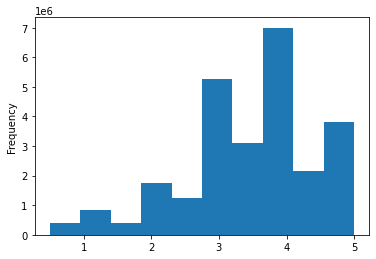

In [485]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

That seems to make sense. People are more likely to give whole number ratings than half, which explains the spikes in the histogram. The median score is 3.5, the mean is 3.53, and all the ratings are between 0 and 5.

# 8.4.1: Merge Wikipedia and Kaggle Metadata
Now that the Wikipedia data and Kaggle data are cleaned up and in tabular formats with the right data types for each column, Britta can join them together. However, after they're joined, the data still needs to be cleaned up a bit, especially where Kaggle and Wikipedia data overlap.

With all the tables cleaned up, we're ready to merge them by IMDb ID.

Print out a list of the columns so we can identify which ones are redundant. We'll use the suffixes parameter to make it easier to identify which table each column came from.

In [486]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])
movies_df.head()

,url,year,imdb_link,title_wiki,Based on,Starring,Narrated by,Cinematography,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,...,1990-08-24,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,...,1990-12-25,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",US,...,1990-12-21,0.00,95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00


There are seven pairs of columns that have redundant information. We'll look at each pair of columns and decide how to handle the data.

There are a few options when dealing with redundant data. We'll consider two. The simplest is to just drop one of the competing columns, but sometimes that means a loss of good information. Sometimes, one column will have data where the other has missing data, and vice versa. In that case, we'd want the other option: fill in the gaps using both columns.

Below is the list of competing columns. We'll fill in the resolution to each pair as we go along. We'll hold off on implementing the resolutions until we make a decision for each pair because if we did, we might inadvertently remove data that could be helpful in making a later decision.

You may find it helpful to include a table like this in your Jupyter Notebook that documents the decisions made and the justifications for them. Unfortunately, markdown doesn't support formatting tables. One way to work around that is to just write your text down as comments in a code cell.

In [487]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

## Title
First, just take a quick look at some of the titles.



In [488]:
# Check movie titles
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


They both seem pretty consistent, which we'd expect. Look at the rows where the titles don't match.

In [489]:
# Check rows where titles don't match
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


Both options look pretty good, but the Kaggle data looks just a little bit more consistent. Let's confirm there aren't any missing titles in the Kaggle data with the following code:

In [490]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Narrated by,Cinematography,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


No results were returned, so we can just drop the Wikipedia titles. Note that for now, we’re merely noting the resolution.

## Runtime
Next, look at running_time versus runtime. A scatter plot is a great way to give us a sense of how similar the columns are to each other. If the two columns were exactly the same, we'd see a scatter plot of a perfectly straight line. Any wildly different values will show up as dots far from that central line, and if one column is missing data, those values will fall on the x-axis or y-axis.

#### CAUTION
Because we're dealing with merged data, we should expect there to be missing values. Scatter plots won't show null values, so we need to fill them in with zeros when we're making our plots to get the whole picture.

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

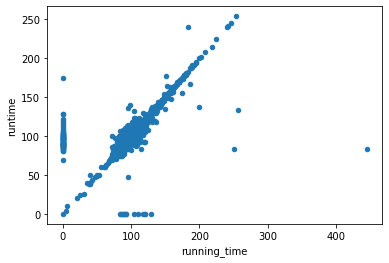

In [491]:
# Fill in missing values with zero and make the scatter plot
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

Notice that there are more data points on the origin of the Y axis than on the origin of the X axis. Since the X axis is Wikipedia and the Y axis is Kaggle, this means there are more missing entries in the Wikipedia data set than in the Kaggle data set. Also, most of the runtimes are pretty close to each other but the Wikipedia data has some outliers, so the Kaggle data is probably a better choice here. However, we can also see from the scatter plot that there are movies where Kaggle has 0 for the runtime but Wikipedia has data, so we'll fill in the gaps with Wikipedia data.

## Budget
Since budget_wiki and budget_kaggle are numeric, we'll make another scatter plot to compare the values.

Here are some questions to consider when interpreting this scatter plot:

- Which dataset seems to have more outliers?
- Which dataset seems to have more missing data points?
- If we were to fill in the missing data points of one set with the other, which would be more likely to give us consistent data?
- Is it better to start with a base of consistent data and fill in missing points with possible outliers? Or is it better to start with a base of data with outliers and fill in missing points with more consistent data?

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

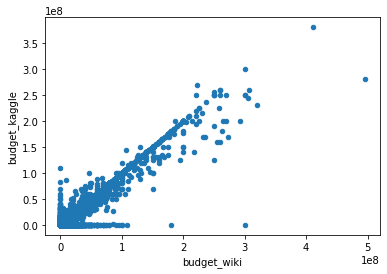

In [492]:
# Compare budget_wiki and budget_kaggle values
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

The Wikipedia data appears to have more outliers compared to the Kaggle data. However, there are quite a few movies with no data in the Kaggle column, while Wikipedia does have budget data. Therefore, we'll fill in the gaps with Wikipedia's data.

## Box Office
The box_office and revenue columns are numeric, so we'll make another scatter plot.

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

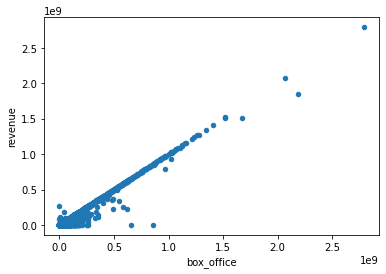

In [493]:
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

That looks pretty close, but we might be getting thrown off by the scale of that large data point. Let's look at the scatter plot for everything less than $1 billion in box_office.

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

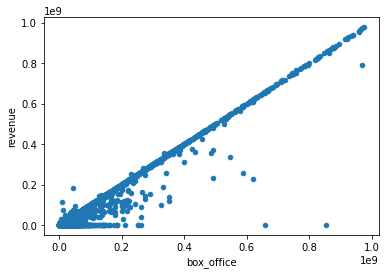

In [494]:
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')


## Release Date
Inspect portion of the process

For release_date_wiki and release_date_kaggle, we can't directly make a scatter plot, because the scatter plot only works on numeric data. However, there's a tricky workaround that we can use. We'll use the regular line plot (which can plot date data), and change the style to only put dots by adding style='.' to the plot() method:

<AxesSubplot:xlabel='release_date_wiki'>

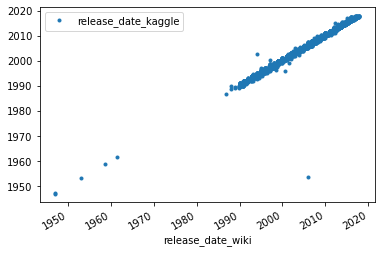

In [495]:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')


We should investigate that wild outlier around 2006. We're just going to choose some rough cutoff dates to single out that one movie. We'll look for any movie whose release date according to Wikipedia is after 1996, but whose release date according to Kaggle is before 1965. Here's what your code should look like:

In [496]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Narrated by,Cinematography,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",NaN,Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


Based on the output, it looks like somehow The Holiday in the Wikipedia data got merged with From Here to Eternity. We'll have to drop that row from our DataFrame. We'll get the index of that row with the following:

In [503]:
# get row index
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([], dtype='int64')

Then we can drop that row like this:



In [504]:
# drop row
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

Now, see if there are any null values:

In [505]:
# check null values
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Narrated by,Cinematography,Release date,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",NaN,Geoff George,NaN,United States,...,1995-08-22,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.10,7.00
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",NaN,Michael Spiller,NaN,"[United States, Germany, Japan, [1]]",...,1995-09-14,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.50,4.00
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,NaN,Miroslav Ondrícek,NaN,NaN,...,1995-11-17,0.00,95.00,[],Released,NaN,Let It Be Me,False,8.00,2.00
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,NaN,Ken Kelsch,NaN,NaN,...,1998-01-01,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.00,1.00
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",NaN,Steven Bernstein,NaN,United States,...,1997-01-01,0.00,110.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.50,4.00
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",NaN,Philip D. Schwartz,NaN,United States,...,1999-02-22,0.00,86.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.70,6.00
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",NaN,John L. Demps Jr.,NaN,NaN,...,2000-01-01,0.00,107.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.00,0.00
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,United States,...,2002-09-09,"97,000.00",140.00,[],NaN,NaN,Stevie,False,6.70,13.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,NaN,"[Denmark, USA, UK]",...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,NaN,United States,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


The Wikipedia data is missing release dates for 11 movies:
\ But the Kaggle data isn't missing any release dates. In this case, we'll just drop the Wikipedia data.

## Language
#### NOTE:
We don't need to worry about what hashing is right now, but if you're curious, hashing is a clever computer science trick that can be used to speed up algorithms like getting value counts. Hashing converts values, even arbitrarily long strings, to a limited space of numerical values. We'll talk about hashing more when we get to machine learning, but for now, the important part is that Python creates hash values when new objects are created if they are immutable. Since mutable objects can have their values change after being created, the values might change and not match the hash, so Python just refuses.

We need to convert the lists in Language to tuples so that the value_counts() method will work.

In [506]:
# convert lists in Language to tuples
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                              5479
NaN                                   134
(English, Spanish)                     68
(English, French)                      35
(English, Japanese)                    25
                                     ... 
(English, Yiddish)                      1
(English, Arabic, Italian, Latin)       1
(English, Old Norse)                    1
(Portuguese, English)                   1
English, Arabic, Lakota                 1
Name: Language, Length: 198, dtype: int64

For the Kaggle data, there are no lists, so we can just run value_counts() on it.

In [508]:
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
pt       4
zh       4
ja       4
hi       2
da       2
tr       1
ko       1
sv       1
ab       1
ar       1
he       1
ru       1
cn       1
Name: original_language, dtype: int64

#### NOTE
There's a trade-off here between the Wikipedia language data and the Kaggle language data. While the Wikipedia data has more information about multiple languages, the Kaggle data is already in a consistent and usable format. Parsing the Wikipedia data may create too many difficulties to make it worthwhile, though.

This is another judgment call; there's no clear-cut answer here. However, for better or for worse, decisions that save time are usually the ones that win, so we'll use the Kaggle data here.

## Production Companies

Again, we'll start off just taking a look at a small number of samples.


In [509]:
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


The Kaggle data is much more consistent, and it would be difficult, if not impossible, to translate the Wikipedia data into the same format. We'll drop the Wikipedia data in this case.

| Wikipedia         | Kaggle          | Resolution |
| ---               | ---             | ---|
| title_wiki        | title_kaggle | Drop Wikipedia
| running_time      | runtime | Keep Kaggle; fill in zeros with Wikipedia data.
| budget_wiki           | budget_kaggle | Keep Kaggle; fill in zeros with Wikipedia data.
| box_office            | revenue | Keep Kaggle; fill in zeros with Wikipedia data.
| release_date_wiki     | release_date_kaggle | Drop Wikipedia.
| Language              | original_language | Drop Wikipedia. 
| Production company(s) | production_companies | Drop Wikipedia.


## Put It All Together
First, we'll drop the title_wiki, release_date_wiki, Language, and Production company(s) columns.

In [521]:
# drop title_wiki, release_date_wiki, Language, and Production company(s)
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

KeyError: "['title_wiki' 'release_date_wiki' 'Language' 'Production company(s)'] not found in axis"

Next, to save a little time, we'll make a function that fills in missing data for a column pair and then drops the redundant column.

In [522]:
#  fill in missing data for a column pair and drop the redundant column
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

Now we can run the function for the three column pairs that we decided to fill in zeros.

In [523]:
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')


KeyError: "['running_time'] not found in axis"

Since we've merged our data and filled in values, it's good to check that there aren't any columns with only one value, since that doesn't really provide any information. Don't forget, we need to convert lists to tuples for value_counts() to work.

In [524]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

Recorded
Venue
Label
video


Running this, we see that 'video' only has one value:

In [526]:
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

Since it's false for every row, we don't need to include this column.

#### SKILL DRILL
How could you replace the previous for loop with a list comprehension?

We should reorder the columns to make the dataset easier to read for the hackathon participants. Having similar columns near each other helps people looking through the data get a better sense of what information is available. One way to reorder them would be to consider the columns roughly in groups, like this:

1. Identifying information (IDs, titles, URLs, etc.)
2. Quantitative facts (runtime, budget, revenue, etc.)
3. Qualitative facts (genres, languages, country, etc.)
4. Business data (production companies, distributors, etc.)
5. People (producers, director, cast, writers, etc.)

The following code is one way to reorder the columns:

In [527]:
# reorder columns
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

Finally, we need to rename the columns to be consistent.

In [528]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

#### NOTE
If you did not use .loc to reorder the columns and instead passed a list of column names to the indexing operator (i.e. movies_df = movies_df[[‘imdb_id’, ‘title_kaggle’, … ]]), you may receive a SettingWithCopyWarning. Don't panic! This isn't an error, so your code will continue to work, but it is a warning that your code may not behave as you expect. In this case, your code will work fine, but for best practices, use .loc instead to avoid this warning.

Your first merge is done! We got the tough one out of the way first, and now we're almost done.

# 8.4.2: Transform and Merge Rating Data
Britta wants to include the rating data with the movie data, but it's a very large dataset. She wants to reduce the ratings data to a useful summary of rating information for each movie, and then make the full dataset available to the hackathon participants if they decide they need more granular rating information.

For each movie, Britta wants to include the rating data, but the rating dataset has so much information that it's too unwieldy to use all of it. We could calculate some basic statistics like the mean and median rating for each movie, but a more useful summary is just to count how many times a movie received a given rating. This way, someone who wants to calculate statistics for the dataset would have all the information they need. 

We'll include the raw ratings data if the hackathon participants want to do more in-depth analysis, such as comparing across users, but having the rating counts for each movie is easy enough to do. Plus, it will enable the hackathon participants to calculate statistics on their own without having to work with a dataset containing 26-million rows.

First, we need to use a groupby on the "movieId" and "rating" columns and take the count for each group.

In [529]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count()

Then we'll rename the "userId" column to "count."



#### NOTE
The choice of renaming "userId" to "count" is arbitrary. Both "userId" and "timestamp" have the same information, so we could use either one.

In [530]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1)

Now the magical part. We can pivot this data so that movieId is the index, the columns will be all the rating values, and the rows will be the counts for each rating value.

In [531]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')

We want to rename the columns so they're easier to understand. We'll prepend rating_ to each column with a list comprehension:

In [532]:
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

Now we can merge the rating counts into movies_df.
This time, we need to use a left merge, since we want to keep everything in movies_df:

In [533]:
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

Finally, because not every movie got a rating for each rating level, there will be missing values instead of zeros. We have to fill those in ourselves, like this:

In [534]:
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)

And we're done—we just finished the Transform step in ETL! Now all that's left is loading our tables into SQL.